In [92]:
from __future__ import division
from sklearn.cluster import KMeans
from numbers import Number
from pandas import DataFrame
import sys, codecs, numpy

In [93]:
class autovivify_list(dict):
  def __missing__(self, key):
    '''Given a missing key, set initial value to an empty list'''
    value = self[key] = []
    return value

  def __add__(self, x):
    '''Override addition for numeric types when self is empty'''
    if not self and isinstance(x, Number):
      return x
    raise ValueError

  def __sub__(self, x):
    '''Also provide subtraction method'''
    if not self and isinstance(x, Number):
      return -1 * x
    raise ValueError

In [94]:
def build_word_vector_matrix(vector_file, n_words):
  '''Return the vectors and labels for the first n_words in vector file'''
  numpy_arrays = []
  labels_array = []
  with codecs.open(vector_file, 'r', 'utf-8') as f:
    for c, r in enumerate(f):
      sr = r.split()
      labels_array.append(sr[0])
      numpy_arrays.append( numpy.array([float(i) for i in sr[1:]]) )

      if c == n_words:
        return numpy.array( numpy_arrays ), labels_array

  return numpy.array( numpy_arrays ), labels_array

In [95]:
def find_word_clusters(labels_array, cluster_labels):
  '''Return the set of words in each cluster'''
  cluster_to_words = autovivify_list()
  for c, i in enumerate(cluster_labels):
    cluster_to_words[ i ].append( labels_array[c] )
  return cluster_to_words

In [96]:
input_vector_file = 'vectors.txt' 
n_words = int(1210) # Number of words to analyze 
reduction_factor = float(0.1) # Amount of dimension reduction {0,1}
n_clusters = int( n_words * reduction_factor ) # Number of clusters to make
df, labels_array = build_word_vector_matrix(input_vector_file, n_words)
kmeans_model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans_model.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=121, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [97]:
cluster_labels  = kmeans_model.labels_
cluster_inertia   = kmeans_model.inertia_
cluster_to_words  = find_word_clusters(labels_array, cluster_labels)
#print(cluster_to_words)
clusters = []
for c in cluster_to_words:
    #print(c)
    #print(cluster_to_words[c])
    clusters.append(cluster_to_words[c])
#print(clusters)

In [98]:
clust_dict = {}
#print(clusters)
for clus in clusters:
    if len(clus) == 1:
        if 0 not in clust_dict:
            clust_dict[0] = clus
        else:
            clust_dict[0] += clus
    else:
        clust_dict[clusters.index(clus)] = clus
for key, value in clust_dict.items():
    print(key, '    ', value)

0      ['the', 'of', 'is', 'to', 'and', '05', 'in', 'that', 'it', 'by', 'are', 'for', 'or', 'used', 'an', 'term', 'on', 'has', 'with', 'we', 'problem']
8      ['be', 'can']
9      ['as', 'documents', 'objects', 'such', 'vectors', 'represented', 'well']
14      ['this', 'example', 'using', 'then', 'same', 'would', 'calculated']
16      ['probability', 'theory', 'prior']
17      ['programming', 'object', 'dynamic', 'at', 'computer', 'oriented', 'science']
19      ['which', 'way', 'form']
21      ['vector', 'space', 'model']
22      ['pagerank', 'page', 'links', 'other', 'pages', 'web']
25      ['from', 'how', 'important', 'results', 'uses', 'high', 'linked', 'name', 'rank', 'sites']
26      ['classes', 'derived', 'base', 'referred']
27      ['h0k', 'he', 'ubx', 'hhk', 'hij', 'hijses']
28      ['all', 'inherit', 'common']
30      ['theorem', 'bayes']
32      ['have', 'been', 'already']
33      ['document', 'each', 'between', 'where', 'query', 'original']
34      ['one', 'class']
35      [

In [99]:
import os, sys, nltk, re

# Open a file
path = "DATA-NLP"
dirs = os.listdir( path )



In [100]:
question_mapping = dict() # Mapping to question dictionary
 # Mapping to student as key and answer as value

for file in dirs:
    if file == '.DS_Store':
            continue
    path_to_file=path+'/'
    file_name = file
    split_name = file.split('_')
    student_name = split_name[0]
    question_number = split_name[1].split('.')[0]
    if question_number not in question_mapping:
        question_mapping[question_number] = {}
    path_to_file += file_name
    with open(path_to_file, 'r', encoding = 'latin1') as f:
        mylist = f.read()
        sent_tokenize_list = nltk.sent_tokenize(mylist)
        temp = []
        for i in sent_tokenize_list:
            sent = i.lower()
            sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
            temp.append(sent)
        question_mapping[question_number][student_name] = temp
        

In [101]:
# Creating vector of sentences

vector_dict = {}
for key, value in question_mapping.items():
    vector_dict[key] = {}
    for student, answer in value.items():
        vector_dict[key][student] = []
        for sent in answer:
            words = sent.split(' ')
            temp_list = []
            for w in words:
                for cluster_key, cluster_value in clust_dict.items():
                    if w in clust_dict[cluster_key]:
                        temp_list.append( cluster_key)
            vector_dict[key][student].append(temp_list)
            
for k, v in vector_dict.items():
    print(k, '    ', v)
    break


taska      {'g0pA': [[36, 0, 62, 62, 0, 17, 17, 17, 33, 0, 62, 63, 0, 0, 58, 53, 26, 0, 58, 0, 75, 26], [14, 0, 0, 0, 53, 26, 0, 75, 0, 53, 0, 49, 0, 0, 75, 26, 0, 53, 53, 0, 26, 0, 0, 0, 53, 34], [36, 69, 0, 0, 69, 0, 63, 33, 65, 0, 9, 0, 14, 0, 0, 49, 0, 67], [14, 69, 0, 63, 8, 8, 9, 73, 33, 67, 14, 8, 0, 52, 63, 0, 49, 68, 0, 14, 8, 52, 0, 0, 67, 0, 0, 61, 68], [0, 14, 63, 67, 14, 8, 42, 9, 0, 61, 0, 61, 34, 68, 14, 8, 42, 9, 0, 61, 0, 61, 34, 45, 0, 68, 34, 0, 67, 34], [36, 8, 0, 64, 33, 44, 14, 54, 73], [0, 14, 0, 54, 68, 58, 0, 68, 0, 52, 40, 26, 0, 0, 45, 67, 0, 67, 9, 49, 49, 73, 0, 67, 0, 0, 68, 67], [14, 14, 0, 49, 0, 67, 0, 67, 26, 14, 28, 53, 0, 49, 25, 49, 0, 68, 0, 67, 26]], 'g0pB': [[36, 0, 62, 62, 0, 17, 17, 17], [0, 69, 0, 75, 0, 75, 34, 66, 0, 53, 26, 0, 0, 69, 0, 63], [0, 14, 0, 69, 0, 0, 0, 69, 0], [49, 0, 48, 28, 48, 68, 25, 74, 42, 32, 58, 68, 54, 32, 43, 0, 0, 48, 32, 43, 0], [55, 49, 68, 0, 28, 73, 0], [0, 14, 14, 0, 14, 8, 55, 0, 61, 0, 63, 68, 0, 22, 9, 0, 28,

In [102]:
vector_name = {}
rep = 0
for key, value in vector_dict.items():
    for student, vector in value.items():
        for v in vector:
            vector_name[tuple(v)] = rep
            rep+=1
        

        

In [103]:
# Creating answer vectors.

pro_dict = {}
for key, value in vector_dict.items():
    pro_dict[key] = {}
    for student, answer in value.items():
        pro_dict[key][student] = []
        for v in answer:
            ans = tuple(v)
            pro_dict[key][student].append(vector_name[ans])

for key, value in pro_dict.items():
    print(key, '    ', value)
    break
    
print(len(pro_dict.keys()))

taska      {'g0pA': [0, 1, 2, 3, 4, 5, 6, 7], 'g0pB': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'g0pC': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'g0pD': [30, 31, 32, 33, 34, 220, 36, 222], 'g0pE': [212, 213, 40, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224], 'g1pA': [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], 'g1pB': [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73], 'g1pD': [74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], 'g2pA': [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 1065, 96, 97, 98, 99], 'g2pB': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112], 'g2pC': [113, 214, 215, 222, 223, 224, 119, 120, 121, 122], 'g2pE': [123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135], 'g3pA': [136, 137, 138, 139, 140, 141, 142], 'g3pB': [143, 144, 145, 146, 147, 148, 149, 150, 151, 152], 'g3pC': [212, 218, 219, 220, 157, 224], 'g4pB': [159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176], 'g4pC': [212, 178, 179, 214, 215, 218

In [104]:
import pyfpgrowth
inp = ["taske", "taska", "taskb", "taskc", "taskd"]

In [105]:
# performing FP_Growth Algorithm

def fp_growth(transactions):
    patterns = pyfpgrowth.find_frequent_patterns(transactions, 3)
    frequent_list = []
    for p in patterns:
        if len(p) < 3:
            continue
        else:
            frequent_list.append(list(p))
    return frequent_list


In [106]:
def is_sub(sub, lst):
    ln = len(sub)
    for i in range(len(lst) - ln + 1):
        if all(sub[j] == lst[i+j] for j in range(ln)):
            return True
    return False

In [107]:
def output(frequent_list):
    output_dict= {}
    for lst in frequent_list:
        for k, v in pro_dict.items():
            for name, vec in v.items():
                if is_sub(lst,vec):
                    if k not in output_dict:
                        output_dict[k] = [name]
                    else:
                        output_dict[k].append(name)
    return output_dict

  

In [116]:
# Final output from our script.

final= {}
for task in inp:
    transactions = []
    for k, v in pro_dict.items():
        if k == task:
            for name, vec in v.items():
                transactions.append(vec)
            frequent_list = fp_growth(transactions)
    output_dict = output(frequent_list)
    for key, value in output_dict.items():
        final[key] = set(value)
print("Frequent Item-sets By the FP-Growth:-")        
print(frequent_list)
print("\n")
for i, v in final.items():
    print(i, ' Copied By-->   ', v)


Frequent Item-sets By the FP-Growth:-
[[821, 823, 831], [819, 823, 831], [819, 821, 831], [819, 821, 823, 831], [788, 819, 821], [816, 819, 821], [819, 821, 823]]


taske  Copied By-->    {'g1pB', 'orig', 'g0pE', 'g2pB'}
taska  Copied By-->    {'g4pC', 'g3pC', 'orig', 'g2pC', 'g0pE'}


In [109]:
import pandas as pd
xl = pd.ExcelFile("corpus_final.xls")

In [110]:
df = xl.parse("File list")
df1 = xl.parse("Sheet1")

In [111]:
c = df[['File','Category']]



In [117]:
# Evaluation

tp = 0
tn = 0
fn = 0
fp = 0
for key, value in final.items():
    for v in value:
        m=v+'_'+key
        print(m)
        ans = v+key+'.txt'
        head = key
        for index, row in c.iterrows():
            if row['File'].split('_')[1].split('.')[0] == head:
                if row['File'].split('_')[0] == v:
                    if row['Category'] == 'cut' or row['Category'] == 'heavy':
                        tp+=1
                    else:
                        fp+=1
                else:
                    if row['Category'] == 'cut' or row['Category'] == 'heavy':
                        fn +=1
                    else:
                        tn+=1
print(tp)
print(fp)
print(tn)
print(fn)
precision = float(tp/(tp+fp))                        
print('Precision is : ', precision)
recall = float(tp/(tp+fn))
print('Recall is : ', recall)
print('Accuracy is : ', (tp+tn)/(tp+fn+tn+fp))



                

g1pB_taske
orig_taske
g0pE_taske
g2pB_taske
g4pC_taska
g3pC_taska
orig_taska
g2pC_taska
g0pE_taska
6
1
103
61
Precision is :  0.8571428571428571
Recall is :  0.08955223880597014
Accuracy is :  0.6374269005847953


Confusion matrix, without normalization
[[55  2]
 [26 12]]


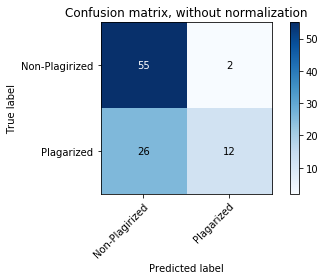

In [113]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(df1['Actual'].values, df1['Predicted'].values, classes=["Non-Plagirized","Plagarized"],
                      title='Confusion matrix, without normalization')

In [114]:
#for i in range(len(df1)):
#   print(df1.iloc[i:,8:9])
df1['Actual'].values

array(['Non-Plagarized', 'Plagarized', 'Non-Plagarized', 'Plagarized',
       'Non-Plagarized', 'Non-Plagarized', 'Non-Plagarized', 'Plagarized',
       'Non-Plagarized', 'Plagarized', 'Plagarized', 'Non-Plagarized',
       'Non-Plagarized', 'Plagarized', 'Non-Plagarized', 'Plagarized',
       'Non-Plagarized', 'Plagarized', 'Non-Plagarized', 'Non-Plagarized',
       'Non-Plagarized', 'Plagarized', 'Non-Plagarized', 'Non-Plagarized',
       'Plagarized', 'Non-Plagarized', 'Plagarized', 'Non-Plagarized',
       'Plagarized', 'Non-Plagarized', 'Non-Plagarized', 'Non-Plagarized',
       'Plagarized', 'Non-Plagarized', 'Plagarized', 'Non-Plagarized',
       'Plagarized', 'Non-Plagarized', 'Non-Plagarized', 'Plagarized',
       'Non-Plagarized', 'Plagarized', 'Non-Plagarized', 'Plagarized',
       'Non-Plagarized', 'Non-Plagarized', 'Non-Plagarized', 'Plagarized',
       'Non-Plagarized', 'Plagarized', 'Plagarized', 'Non-Plagarized',
       'Non-Plagarized', 'Plagarized', 'Non-Plagarized', 